# Graph Convolutional Network

+ Author: Jingxuan Yang
+ E-mail: yangjx20@mails.tsinghua.edu.cn
+ Page: www.jingxuanyang.com
+ Date: 2021-05-14
+ Project: Pattern Recognition, homework 11
+ Purpose: Implement GCN on Zachary's Karate Club

## Import packages

In [1]:
import numpy as np
import networkx as nx
from networkx import karate_club_graph, to_numpy_matrix
import matplotlib.pyplot as plt


## Obtain karate club graph

In [2]:
zkc = karate_club_graph()
order = sorted(list(zkc.nodes()))
A = to_numpy_matrix(zkc, nodelist=order)
I = np.eye(zkc.number_of_nodes())
A_hat = A + I
D_vec = np.array(np.sum(A_hat, axis=1))[:,0]
D_hat = np.matrix(np.diag(D_vec))

## draw karate club graph

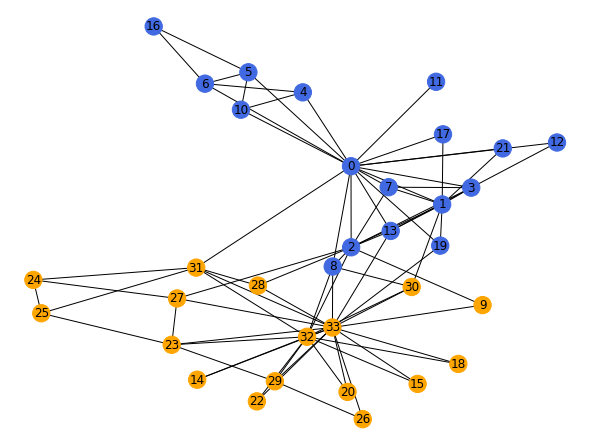

In [3]:
colors = ['royalblue','orange']
color_labels = []
for i in range(len(zkc.nodes())):
    if zkc.nodes()[i]['club'] == 'Mr. Hi':
        color_labels.append(colors[0])
    else:
        color_labels.append(colors[1])

plt.figure(figsize=(8,6))
nx.draw(zkc, with_labels=True, node_color=color_labels)
# plt.savefig('../doc/figures/zkc_init.jpg', dpi=300)
plt.show()

## Define functions

In [4]:
def relu(x):
	return np.maximum(0.0, x)

def gcn_layer(A_hat, D_hat, X, W):
    return relu(D_hat**-1 * A_hat * X * W)


## Build GCN and draw outcoms

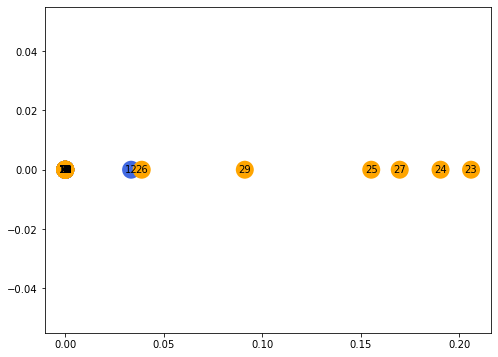

In [5]:
W_1 = np.random.normal(loc=0, scale=1, size=(zkc.number_of_nodes(), 4))
W_2 = np.random.normal(loc=0, size=(W_1.shape[1], 2))

H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)

output = H_2.getA().tolist()

x = [i[0] for i in output]
y = [i[1] for i in output]

plt.figure(figsize=(8,6))
plt.scatter(x, y, color=color_labels, linewidths=12)
for i,txt in enumerate(zkc.nodes()):
    plt.annotate(txt,(x[i],y[i]), ha='center', va='center')
# plt.savefig('../doc/figures/zkc_gcn.jpg', dpi=300)